In [299]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree, export_text
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

In [300]:
# We use url, but can also download and access it locally
dataset_path = 'https://raw.githubusercontent.com/Koldim2001/test_api/refs/heads/main/titanic.csv' 
df = pd.read_csv(dataset_path)

In [301]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [303]:
df = df[['Survived', 'Pclass', 'Age', 'Fare']]  # The subset (columns) we selected for this project
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       714 non-null    float64
 3   Fare      891 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [304]:
df = df.dropna(subset=['Age'])

In [305]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Age       714 non-null    float64
 3   Fare      714 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 27.9 KB


In [306]:
df.drop(columns='Survived')  # These are our features

,Pclass,Age,Fare
0,3,22.0,7.2500
1,1,38.0,71.2833
2,3,26.0,7.9250
3,1,35.0,53.1000
4,3,35.0,8.0500
...,...,...,...
885,3,39.0,29.1250
886,2,27.0,13.0000
887,1,19.0,30.0000
889,1,26.0,30.0000


In [307]:
# Splitdataset
train, test = train_test_split(df, test_size=0.2)

In [308]:
train.head()

,Survived,Pclass,Age,Fare
227,0,3,20.5,7.2500
631,0,3,51.0,7.0542
869,1,3,4.0,11.1333
124,0,1,54.0,77.2875
390,1,1,36.0,120.0000


In [309]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Plots confusion matrix
    cm - confusion matrix
    classes - class list
    normalize - normalize to 1 if True
    title - plot title
    cmap - color map
    """

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [310]:
def experiment(max_depth, min_samples_split):
    """
    Builds and trains Decision Tree model
    """
    # Build and train Decision Tree model
    model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)
    model.fit(train.drop('Survived', axis=1), train['Survived'])

    # Calculate accuracy metrics
    preds = model.predict(test.drop('Survived', axis=1))
    acc = accuracy_score(test['Survived'], preds)
    cm = confusion_matrix(test['Survived'], preds)

    print("accuracy", acc)

    # Plot confusion matrix
    plot_confusion_matrix(cm, classes=['Not Survived', 'Survived'])

    # Classification report
    report = classification_report(test['Survived'], preds, target_names=['Not Survived', 'Survived'])
    print(report)

    # Save model in pickle format
    with open('N:\Y3\TB2\Big Data\pickle', 'wb') as f:
        pickle.dump(model, f)

<>:24: SyntaxWarning: invalid escape sequence '\Y'
<>:24: SyntaxWarning: invalid escape sequence '\Y'
/tmp/ipykernel_5966/2581442912.py:24: SyntaxWarning: invalid escape sequence '\Y'
  with open('N:\Y3\TB2\Big Data\pickle', 'wb') as f:


In [311]:
# Define model hyperparameters
max_depth = 5
min_samples_split = 150

accuracy 0.6643356643356644
Confusion matrix, without normalization
              precision    recall  f1-score   support

Not Survived       0.69      0.76      0.72        82
    Survived       0.62      0.54      0.58        61

    accuracy                           0.66       143
   macro avg       0.66      0.65      0.65       143
weighted avg       0.66      0.66      0.66       143



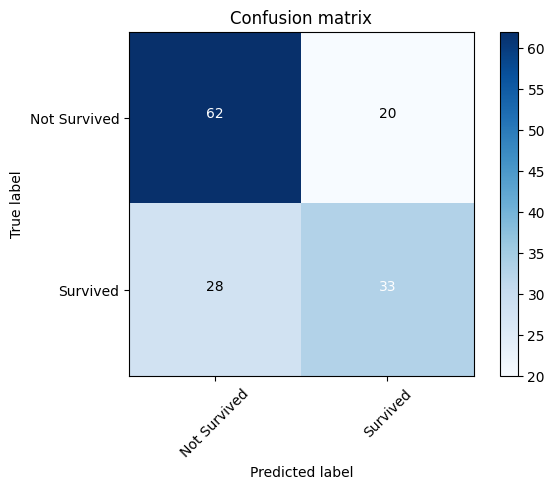

In [312]:
experiment(max_depth, min_samples_split)

In [313]:
# Load model from pkl
with open('N:\Y3\TB2\Big Data\pickle', 'rb') as f:
    model = pickle.load(f)

<>:2: SyntaxWarning: invalid escape sequence '\Y'
<>:2: SyntaxWarning: invalid escape sequence '\Y'
/tmp/ipykernel_5966/3554840508.py:2: SyntaxWarning: invalid escape sequence '\Y'
  with open('N:\Y3\TB2\Big Data\pickle', 'rb') as f:


In [314]:
# Predict outcome of Titanic trip for a person
person = pd.DataFrame({
	'Pclass':[3],
	'Age':[55],
	'Fare':[7.2500]	
})

prediction = model.predict(person)
print(f"The model predicts {prediction}")

The model predicts [0]


In [315]:
if prediction == [1]:
    print ("This person is, the most likely, is a survivor.")
else:
    print("This person, the most likely, perished.")

This person, the most likely, perished.


[Text(0.45454545454545453, 0.9166666666666666, 'Pclass <= 2.5\ngini = 0.48\nsamples = 571\nvalue = [342, 229]'),
 Text(0.18181818181818182, 0.75, 'Fare <= 13.646\ngini = 0.49\nsamples = 290\nvalue = [124, 166]'),
 Text(0.3181818181818182, 0.8333333333333333, 'True  '),
 Text(0.09090909090909091, 0.5833333333333334, 'gini = 0.444\nsamples = 69\nvalue = [46, 23]'),
 Text(0.2727272727272727, 0.5833333333333334, 'Age <= 59.0\ngini = 0.457\nsamples = 221\nvalue = [78, 143]'),
 Text(0.18181818181818182, 0.4166666666666667, 'Age <= 17.5\ngini = 0.433\nsamples = 205\nvalue = [65, 140]'),
 Text(0.09090909090909091, 0.25, 'gini = 0.069\nsamples = 28\nvalue = [1, 27]'),
 Text(0.2727272727272727, 0.25, 'Fare <= 82.665\ngini = 0.462\nsamples = 177\nvalue = [64, 113]'),
 Text(0.18181818181818182, 0.08333333333333333, 'gini = 0.488\nsamples = 128\nvalue = [54, 74]'),
 Text(0.36363636363636365, 0.08333333333333333, 'gini = 0.325\nsamples = 49\nvalue = [10, 39]'),
 Text(0.36363636363636365, 0.416666666

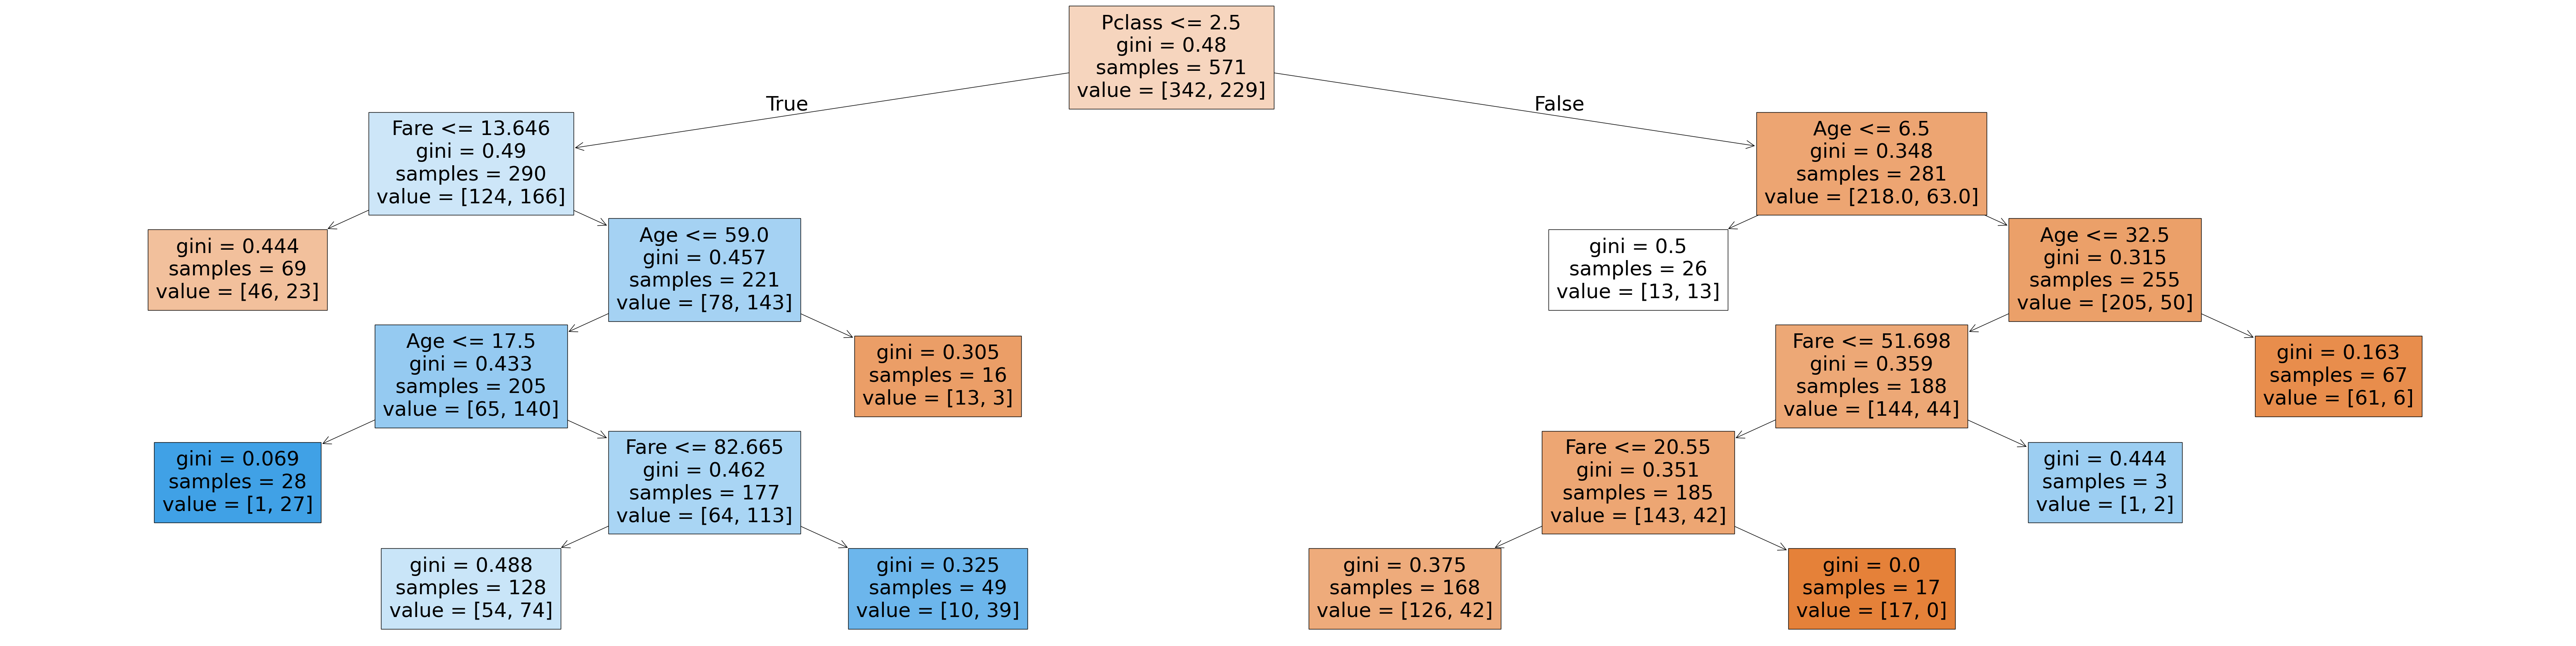

In [316]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=df.drop(columns='Survived').columns, max_depth=5, filled=True)

In [317]:
tree_text = export_text(model, max_depth=5, feature_names=df.drop(columns='Survived').columns)
print(tree_text)

|--- Pclass <= 2.50
|   |--- Fare <= 13.65
|   |   |--- class: 0
|   |--- Fare >  13.65
|   |   |--- Age <= 59.00
|   |   |   |--- Age <= 17.50
|   |   |   |   |--- class: 1
|   |   |   |--- Age >  17.50
|   |   |   |   |--- Fare <= 82.66
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Fare >  82.66
|   |   |   |   |   |--- class: 1
|   |   |--- Age >  59.00
|   |   |   |--- class: 0
|--- Pclass >  2.50
|   |--- Age <= 6.50
|   |   |--- class: 0
|   |--- Age >  6.50
|   |   |--- Age <= 32.50
|   |   |   |--- Fare <= 51.70
|   |   |   |   |--- Fare <= 20.55
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Fare >  20.55
|   |   |   |   |   |--- class: 0
|   |   |   |--- Fare >  51.70
|   |   |   |   |--- class: 1
|   |   |--- Age >  32.50
|   |   |   |--- class: 0



<Axes: title={'center': 'Feature Importance'}, xlabel='importance', ylabel='feature'>

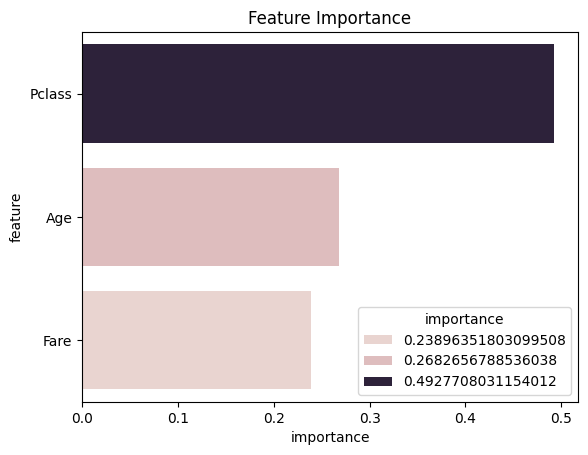

In [318]:
importance_df = pd.DataFrame({
    'feature': df.drop(columns='Survived').columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature', hue='importance')

In [319]:
def max_depth_error(md):
    """
    Returns training and validation (test) accuracy as a function of tree maximum depth
    """
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(train.drop(columns='Survived'), train['Survived'])
    train_acc = 1 - model.score(train.drop(columns='Survived'), train['Survived'])
    test_acc = 1 - model.score(test.drop(columns='Survived'), test['Survived'])
    return {'Max Depth': md, 'Training Error': train_acc, 'Test Error': test_acc}

In [320]:
errors_list = []

for md in range(1, 21):
    result = max_depth_error(md)
    errors_list.append(result)

errors_df = pd.DataFrame(errors_list)

In [321]:
errors_df

,Max Depth,Training Error,Test Error
0,1,0.327496,0.363636
1,2,0.287215,0.328671
2,3,0.252189,0.328671
3,4,0.243433,0.328671
4,5,0.236427,0.328671
5,6,0.215412,0.328671
6,7,0.192644,0.335664
7,8,0.176883,0.342657
8,9,0.147110,0.377622
9,10,0.126095,0.377622


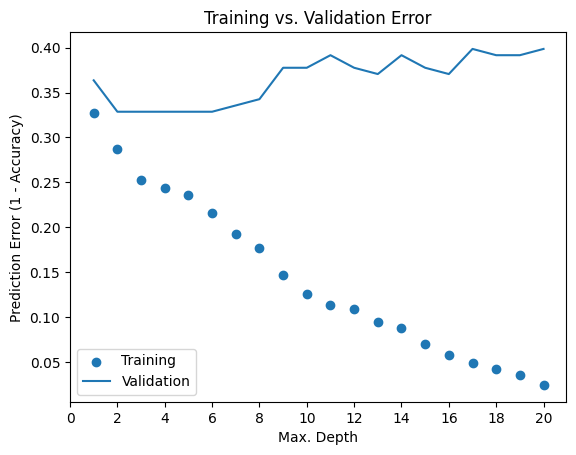

In [322]:
plt.figure()
plt.scatter(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Test Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])
plt.show()

In [323]:
?DecisionTreeClassifier

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
    monotonic_cst=None,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None

In [324]:
import streamlit as st

values = st.slider("Select a range of values", 0.0, 100.0, (25.0, 75.0))
st.write("Values:", values)

2025-03-24 12:36:56.778 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-24 12:36:56.779 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-24 12:36:56.780 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-24 12:36:56.781 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-24 12:36:56.782 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-24 12:36:56.782 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-24 12:36:56.783 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-24 12:36:56.784 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar